In [2]:
import pandas as pd 

left=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data.xlsx')
left_loss=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data_drop.xlsx')

<Axes: >

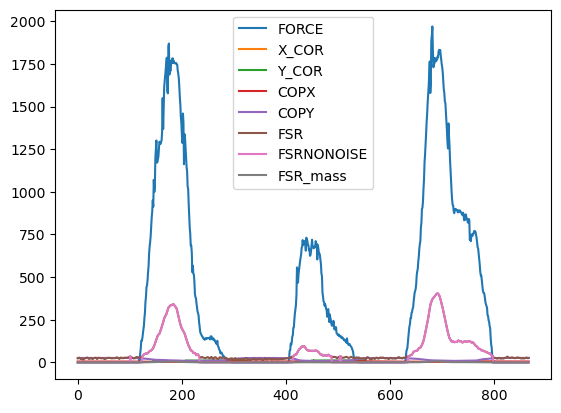

In [3]:
left.plot()

<Axes: >

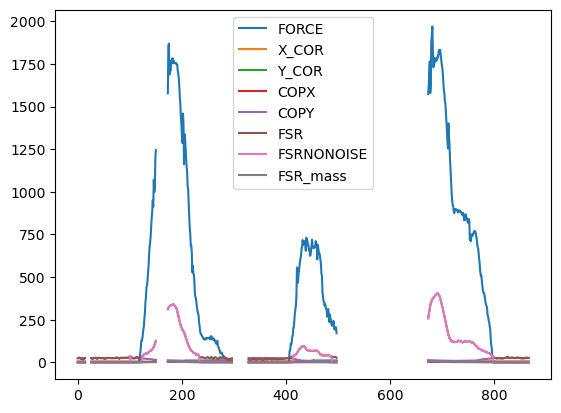

In [4]:
left_loss.plot()

In [5]:
print(left.isnull().sum())
print(left_loss.isnull().sum())

FORCE           0
X_COR         388
Y_COR         629
COPX            0
COPY            0
FSR             0
FSRNONOISE      0
FSR_mass        1
dtype: int64
FORCE         239
X_COR         495
Y_COR         725
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64


In [6]:
left=left.drop(columns=['X_COR','Y_COR'])
left_loss=left_loss.drop(columns=['X_COR','Y_COR'])

In [7]:
print(left.isnull().sum())
print(left_loss.isnull().sum())

FORCE         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      1
dtype: int64
FORCE         239
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64


In [8]:
left=left.fillna(left.mean())


In [9]:
print(left.isnull().sum())
print(left_loss.isnull().sum())

FORCE         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      0
dtype: int64
FORCE         239
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64


In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
left_drop20=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data_drop.xlsx')
left_drop20=left_drop20.drop(columns=['X_COR','Y_COR'])

knnr_left_drop20=left_drop20.copy()
linear_left_drop20=left_drop20.copy()
re_f_left_drop20=left_drop20.copy()
svr_left_drop20=left_drop20.copy()

In [12]:
print(left_drop20.shape)
import numpy as np 
loss_index=np.array(left_drop20.index).reshape(-1,1)[left_drop20.iloc[:,-1].isna()]
#x_test
print(loss_index.shape)

y_train=left_drop20.dropna()
x_train=y_train.index

print(y_train.shape)

(867, 6)
(240, 1)
(627, 6)


In [13]:
for i in range(len(left_drop20.iloc[0])):
    print(i)
    knnr=KNeighborsRegressor(n_neighbors=5)
    linear=LinearRegression()
    re_f=RandomForestRegressor()
    svr=SVR(kernel='rbf')
    
    knnr.fit(np.array(x_train).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    svr.fit(np.array(x_train).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    linear.fit(np.array(x_train).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    re_f.fit(np.array(x_train).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    
    knnr_impute=knnr.predict(np.array(loss_index).reshape(-1,1))
    linear_impute=linear.predict(np.array(loss_index).reshape(-1,1))
    re_f_impute=re_f.predict(np.array(loss_index).reshape(-1,1))
    svr_impute=svr.predict(np.array(loss_index).reshape(-1,1))
    c=0
    for l in loss_index:
        knnr_left_drop20.iloc[l,i]=knnr_impute[c]
        linear_left_drop20.iloc[l,i]=linear_impute[c]
        re_f_left_drop20.iloc[l,i]=re_f_impute[c]
        svr_left_drop20.iloc[l,i]=svr_impute[c]
        c+=1
    

0
1
2


/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector 

3
4
5


/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector 

Text(0.5, 1.0, 'svr')

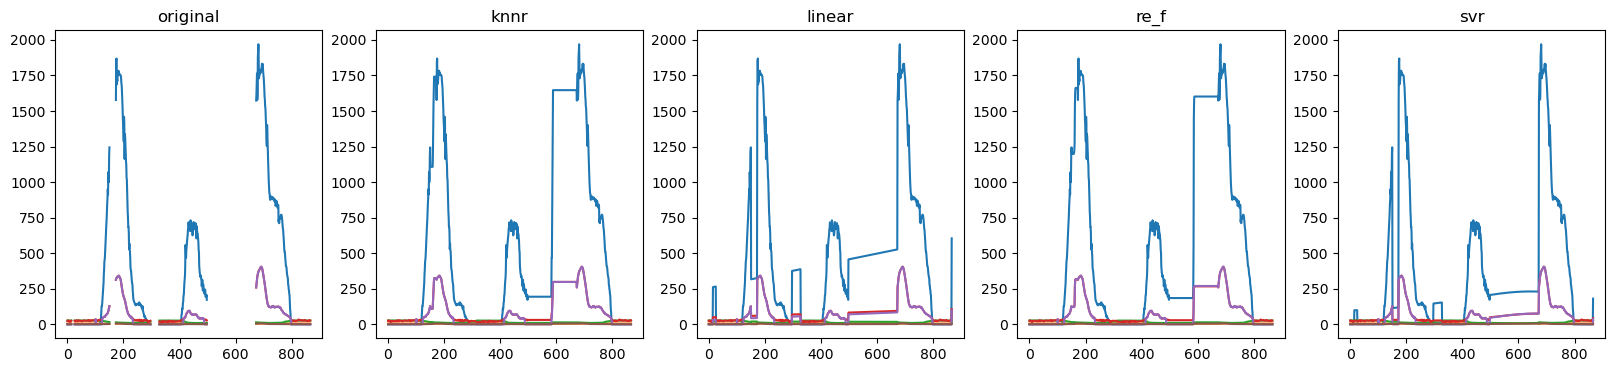

In [16]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
def RMSE(real,pred):
    real=np.array(real).reshape(-1,1)
    pred=np.array(pred).reshape(-1,1)
    return mean_squared_error(real,pred)**0.5


f=plt.figure(figsize=(20,4))
ax=f.add_subplot(1,5,1)
ax.plot(left_drop20)
ax.set_title('original')

ax=f.add_subplot(1,5,2)
ax.plot(knnr_left_drop20)
ax.set_title('knnr')

ax=f.add_subplot(1,5,3)
ax.plot(linear_left_drop20)
ax.set_title('linear')

ax=f.add_subplot(1,5,4)
ax.plot(re_f_left_drop20)
ax.set_title('re_f')

ax=f.add_subplot(1,5,5)
ax.plot(svr_left_drop20)
ax.set_title('svr')

In [17]:
knnr_RMSE=[]
for i in range(6):
    knnr_RMSE.append(RMSE(left.iloc[:,i],knnr_left_drop20.iloc[:,i]))
linear_RMSE=[]
for i in range(6):
    linear_RMSE.append(RMSE(left.iloc[:,i],linear_left_drop20.iloc[:,i]))
re_f_RMSE=[]
for i in range(6):
    re_f_RMSE.append(RMSE(left.iloc[:,i],re_f_left_drop20.iloc[:,i]))
svr_RMSE=[]
for i in range(6):
    svr_RMSE.append(RMSE(left.iloc[:,i],svr_left_drop20.iloc[:,i]))

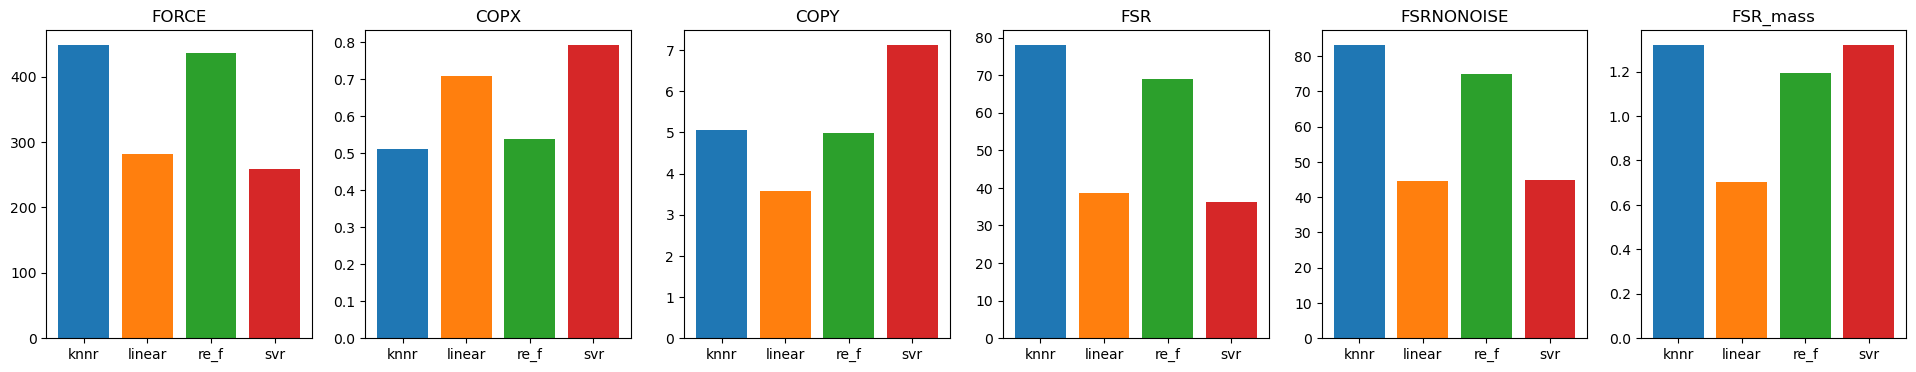

In [19]:

label=left_drop20.columns
f=plt.figure(figsize=(24,4))
for i in range(6):
    ax=f.add_subplot(1,6,i+1)
    ax.set_title(label[i])
    ax.bar(0,knnr_RMSE[i])
    ax.bar(1,linear_RMSE[i])
    ax.bar(2,re_f_RMSE[i])
    ax.bar(3,svr_RMSE[i])
    ax.set_xticks([0,1,2,3],['knnr','linear','re_f','svr'])

In [20]:

fin_left=pd.concat([svr_left_drop20.iloc[:,0],knnr_left_drop20.iloc[:,1],linear_left_drop20.iloc[:,2],
                 svr_left_drop20.iloc[:,3],linear_left_drop20.iloc[:,4],linear_left_drop20.iloc[:,5]],axis=1)

fin_left


,FORCE,COPX,COPY,FSR,FSRNONOISE,FSR_mass
0,0.000000,5.575461,26.583173,24.000000,0.000000,0.000000
1,0.000000,5.578947,26.571607,24.000000,0.000000,0.000000
2,0.000000,5.584776,26.568425,26.000000,0.000000,0.000000
3,0.000000,5.575269,26.562586,28.000000,0.000000,0.000000
4,0.000000,5.583772,26.569648,26.000000,0.000000,0.000000
...,...,...,...,...,...,...
862,0.000000,5.935185,26.638889,29.000000,0.000000,0.000000
863,0.000000,5.940000,26.580000,27.000000,0.000000,0.000000
864,0.000000,6.000000,26.558140,25.000000,0.000000,0.000000
865,0.000000,5.607143,26.428571,25.000000,0.000000,0.000000


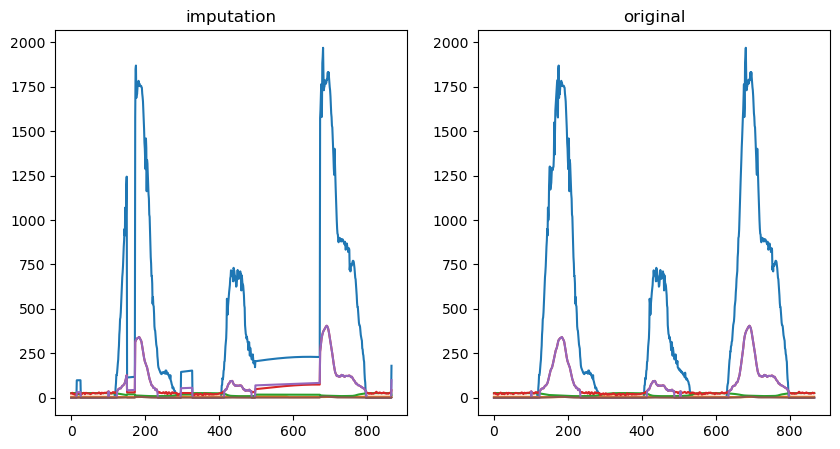

In [21]:
f=plt.figure(figsize=(10,5))
ax=f.add_subplot(1,2,1)
ax.plot(fin_left)
ax.set_title('imputation')
ax=f.add_subplot(1,2,2)
ax.plot(left)
ax.set_title('original')
plt.show()

In [48]:
# 오른쪽으로 왼쪽을 보간한다.

import pandas as pd
right=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/right_data.xlsx')
left=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data.xlsx')
left_drop20=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data_drop.xlsx')

<Axes: >

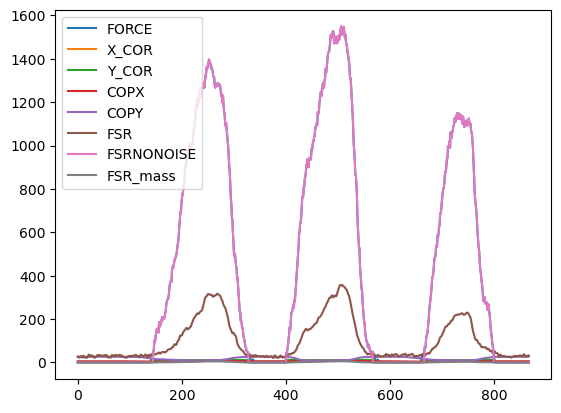

In [49]:
right.plot()

<Axes: >

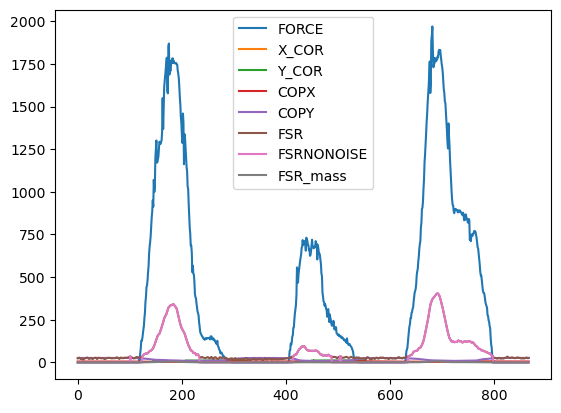

In [50]:
left.plot()

<Axes: >

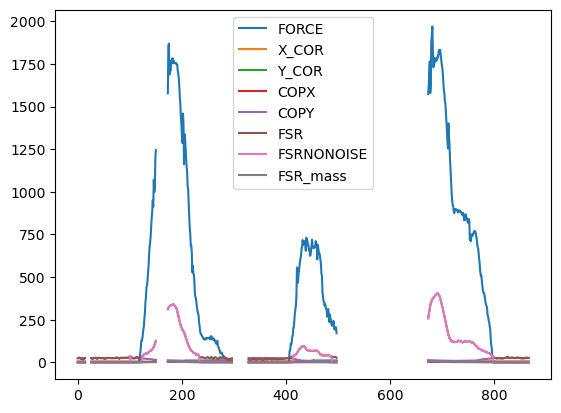

In [51]:
left_drop20.plot()

In [52]:
print(right.isnull().sum())
print(left.isnull().sum())
print(left_drop20.isnull().sum())

FORCE           0
X_COR         358
Y_COR         358
COPX            0
COPY            0
FSR             0
FSRNONOISE      0
FSR_mass        0
dtype: int64
FORCE           0
X_COR         388
Y_COR         629
COPX            0
COPY            0
FSR             0
FSRNONOISE      0
FSR_mass        1
dtype: int64
FORCE         239
X_COR         495
Y_COR         725
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64


In [53]:
right=right.drop(columns=['X_COR','Y_COR'])
left=left.drop(columns=['X_COR','Y_COR'])
left_drop20=left_drop20.drop(columns=['X_COR','Y_COR'])

left=left.fillna(left.mean())

print(right.isnull().sum())
print(left.isnull().sum())
print(left_drop20.isnull().sum())


FORCE         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      0
dtype: int64
FORCE         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      0
dtype: int64
FORCE         239
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64


In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# 나중에 채워넣을 복사본 만들기

knnr_left_drop20=left_drop20.copy()
linear_left_drop20=left_drop20.copy()
re_f_left_drop20=left_drop20.copy()
svr_left_drop20=left_drop20.copy()

In [71]:
import numpy as np
print(left_drop20.shape)
#x_test
loss_index=pd.DataFrame(left_drop20.dropna())
print(loss_index.shape)



(867, 6)
(627, 6)


In [72]:
x_train=pd.DataFrame(right)
y_train=pd.DataFrame(left)


print(x_train.shape)
print(y_train.shape)

(867, 6)
(867, 6)


In [90]:
for i in range(len(right.iloc[0])):
    print(i)
    knnr=KNeighborsRegressor(n_neighbors=5)
    linear=LinearRegression()
    re_f=RandomForestRegressor()
    #svr=SVR(kernel='rbf')
    
    knnr.fit(x_train,y_train)
    linear.fit(x_train,y_train)
    re_f.fit(x_train,y_train)
    #svr.fit(x_train,y_train)
    
    knnr_impute=knnr.predict(loss_index)
    linear_impute=linear.predict(loss_index)
    re_f_impute=re_f.predict(loss_index)
    #vr_impute=svr.predict(loss_index)
    knnr_left_drop20=pd.DataFrame(knnr_impute)
    linear_left_drop20=pd.DataFrame(linear_impute)
    re_f_left_drop20=pd.DataFrame(re_f_impute)
    
   

0
1
2
3
4
5


<Axes: >

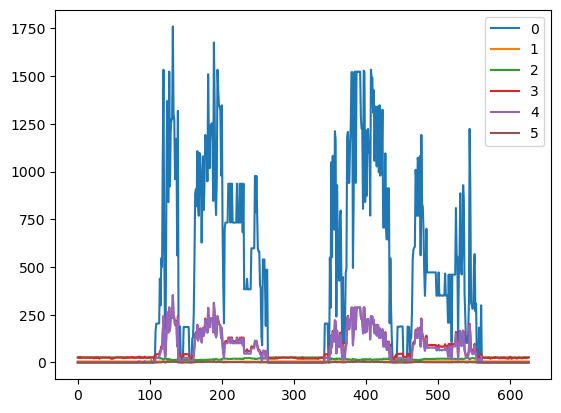

In [92]:
knnr_left_drop20.plot()

Text(0.5, 1.0, 're_f')

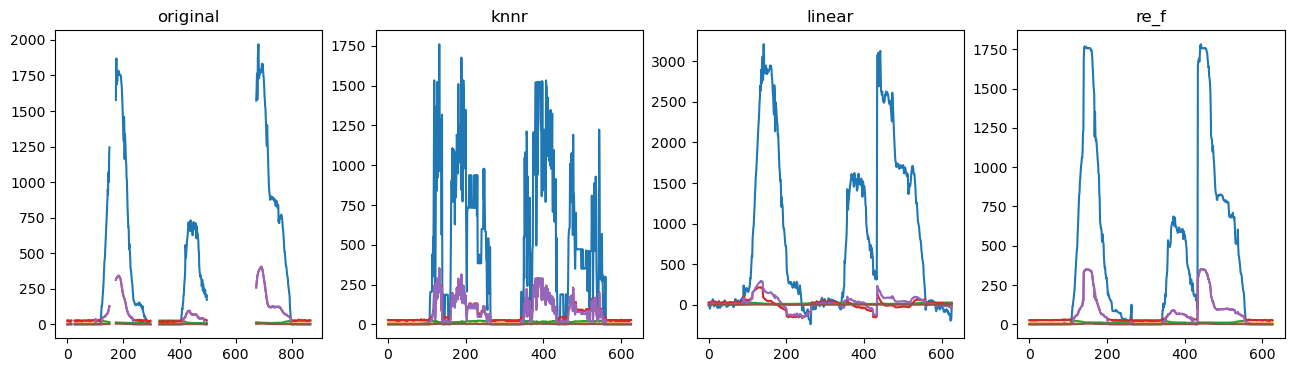

In [93]:

f=plt.figure(figsize=(20,4))
ax=f.add_subplot(1,5,1)
ax.plot(left_drop20)
ax.set_title('original')

ax=f.add_subplot(1,5,2)
ax.plot(knnr_left_drop20)
ax.set_title('knnr')

ax=f.add_subplot(1,5,3)
ax.plot(linear_left_drop20)
ax.set_title('linear')

ax=f.add_subplot(1,5,4)
ax.plot(re_f_left_drop20)
ax.set_title('re_f')



In [95]:
fin_left=pd.concat([re_f_left_drop20.iloc[:,0],knnr_left_drop20.iloc[:,1],linear_left_drop20.iloc[:,2],
                 re_f_left_drop20.iloc[:,3],linear_left_drop20.iloc[:,4],linear_left_drop20.iloc[:,5]],axis=1)

fin_left

,0,1,2,3,4,5
0,0.0,5.575626,26.583173,24.96,2.650408,0.044114
1,0.0,5.575626,26.571607,23.77,2.388521,0.039964
2,0.0,5.560852,26.568425,25.75,-3.705994,-0.056619
3,0.0,5.603595,26.562586,25.17,-8.548943,-0.133358
4,0.0,5.560852,26.569648,25.82,-3.626634,-0.055361
...,...,...,...,...,...,...
622,0.0,5.716767,26.572165,26.91,-24.356658,-0.384010
623,0.0,5.764443,26.638889,28.37,-40.761024,-0.644069
624,0.0,5.782590,26.580000,26.91,-35.416371,-0.559362
625,0.0,5.585213,26.558140,26.99,-34.626429,-0.546877


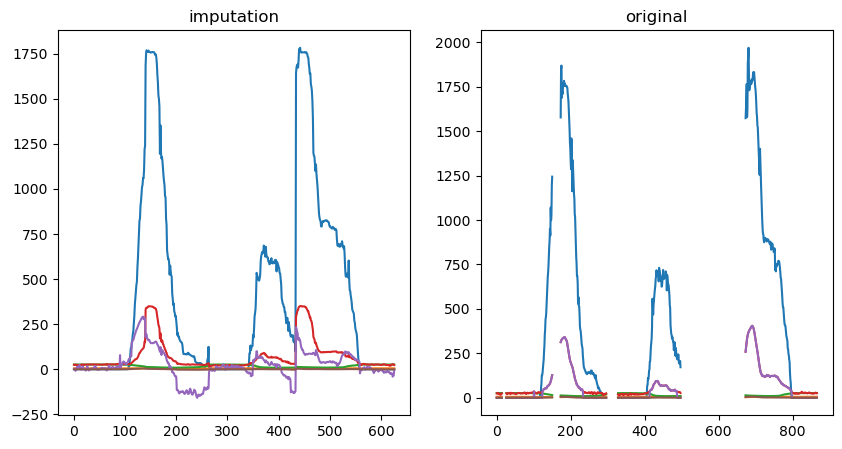

In [96]:
f=plt.figure(figsize=(10,5))
ax=f.add_subplot(1,2,1)
ax.plot(fin_left)
ax.set_title('imputation')
ax=f.add_subplot(1,2,2)
ax.plot(left_drop20)
ax.set_title('original')
plt.show()